In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
#date = datetime.datetime.today().strftime('%Y-%m-%d')
date  = '2019-12-27'
filename = 'oteann_results_'+date+'.csv'
df_results = pd.read_csv(filename)
print(filename)

oteann_results_2019-12-27.csv


In [3]:
df_results.shape

(34, 39)

In [4]:
df_results.head(10)

,date,time,lang,task,lstm,word_len_mean,pronunciation_len_mean,nb_samples,max_len_input,max_len_target,...,test_err_2_label,test_err_2_nb,test_err_2_word,test_err_2_pronunciation,test_err_2_prediction,test_err_3_label,test_err_3_nb,test_err_3_word,test_err_3_pronunciation,test_err_3_prediction
0,2019-12-27,09:54:52,eno,write,512,7.3,7.3,42217,28,29,...,w:-.ɹ.i.v.ɲ.æ.ʃ.+.h.a.r.a.a.ː.,1,ɹivɲæʃ,bʌnjən,haraaː,w:-.ɡ.m.ɫ.ɵ.h.z.k.+.r.ɑ.ʊ.ɒ.ɒ.x.ː.,1,ɡmɲɫɵhzk,tæntələm,rɑʊɒɒxɲː
1,2019-12-27,10:43:41,eno,read,512,7.3,7.3,42217,28,29,...,r:-.m.ɛ.f.a.ɪ.n.+.p.ɪ.ɪ.ɪ.ə.ə.,1,ubθoʌːtʃ,mɛfətaɪn,pɪɪɪəəət,r:-.m.e.l.d.+.s.ɹ.ː.t.,1,əʉɒʒɡ,meɪld,sɹːɪt
2,2019-12-27,11:21:18,ent,write,512,7.3,7.3,42217,28,29,...,w:-.o.+.ʒ.,2,katəlodʒɪk,katəlodʒɪk,katəlʒdʒɪk,w:-.w.+.h.,2,kwɛstʃəwɛɹi,kwɛstʃəwɛɹi,kwɛstʃəhɛɹi
3,2019-12-27,13:15:02,ent,read,512,7.3,7.3,42217,28,29,...,r:-.d.+.n.,2,ɹɛtɹəʊmɪndʒənt,ɹɛtɹəʊmɪndʒənt,ɹɛtɹəʊmɪnnʒənt,r:-.ɛ.+.ɹ.,2,həʊdiɛːɹn,həʊdiɛːɹn,həʊdiːɹɹn
4,2019-12-27,15:14:40,ar,write,512,8.9,8.0,12058,18,21,...,w:-.ا.+.ن.َ.,35,يَعْرُبُوْا,jaʕrubuːaː,يَعْرُبُوْنَ,w:-.+.ّ.,29,دَبَرْنَا,dabarnaː,دَبَّرْنَا
5,2019-12-27,15:55:55,ar,read,512,8.9,8.0,12058,20,19,...,r:-.+.a.,3,تشَارَكَ,tʃaːraka,taʃaːraka,r:-.j.+.i.ː.,2,أَدَبيّ,ʔadabj,ʔadabiː
6,2019-12-27,17:20:29,br,write,512,7.5,6.6,17343,18,21,...,w:-.+.n.,15,dougen,duɡɛn,dougenn,w:-.+.h.,10,nervoniezh,nɛrvɔ̃niɛs,nervoniezhh
7,2019-12-27,18:43:04,br,read,512,7.5,6.6,17343,20,19,...,r:-.x.+.ɣ.,9,sorc'hennoù,sɔrxɛnu,sɔrɣɛnu,r:-.e.+.ɛ.,9,izelek,izelek,izɛlek
8,2019-12-27,20:02:42,de,write,512,11.5,10.2,529742,27,26,...,w:-.+.t.,24,präsent,pʁɛzɛnt,präsentt,w:-.+.n.,18,filternden,fɪltɐndn,filternnden
9,2019-12-27,21:40:50,de,read,512,11.5,10.2,529742,25,28,...,r:-.ɐ.+.ʁ.,10,schmolliertest,ʃmɔliɐtəst,ʃmɔliʁtəst,r:-.+.t.,9,metallplatten,metalplatn,metalplattn


In [5]:
tasks  = df_results.task.unique()
tasks

array(['write', 'read'], dtype=object)

In [6]:
df_results.columns

Index(['date', 'time', 'lang', 'task', 'lstm', 'word_len_mean',
       'pronunciation_len_mean', 'nb_samples', 'max_len_input',
       'max_len_target', 'nb_input_symbols', 'nb_output_symbols', 'x_symbols',
       'y_symbols', 'x_nb_symbols', 'y_nb_symbols', 'trainable_params',
       'training_duration', 'val_accuracy', 'nb_predictions',
       'nb_good_predictions', 'test_err_index', 'test_accuracy',
       'test_duration', 'test_err_1_label', 'test_err_1_nb', 'test_err_1_word',
       'test_err_1_pronunciation', 'test_err_1_prediction', 'test_err_2_label',
       'test_err_2_nb', 'test_err_2_word', 'test_err_2_pronunciation',
       'test_err_2_prediction', 'test_err_3_label', 'test_err_3_nb',
       'test_err_3_word', 'test_err_3_pronunciation', 'test_err_3_prediction'],
      dtype='object')

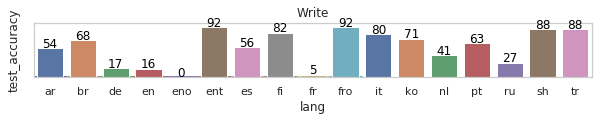

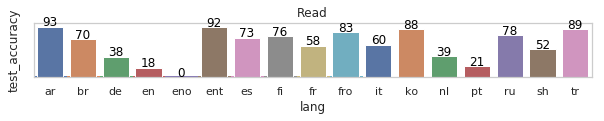

In [7]:
def display_results(df):
    sns.set(style="whitegrid")
    current_palette = sns.color_palette()
    for task in tasks:
        df_o = df[df.task==task].sort_values(by='lang')
        df_o = df_o[['task', 'lang', 'test_accuracy']]
        df_o['test_accuracy']=df_o['test_accuracy']*100
        df_o = df_o.groupby('lang', as_index=False).mean()
        sns.palplot(current_palette)
        ax = sns.barplot(x="lang", y="test_accuracy",
                         data=df_o, palette=current_palette)
        # add the accuracy number on the top of each bar
        i=0
        for index, row in df_o.iterrows():
            ax.text(i, row.test_accuracy+1, str(round(row.test_accuracy)), color='black', ha="center")
            i+=1
        plt.title(task.capitalize())
        plt.ylim(0, 100)
        plt.show()

display_results(df_results)

In [8]:
def display_history(df):
    for i, row in df.iterrows():
        print('test:%d, LANG=%s' % (i, row.lang))
        for column in df.columns:
            print('%s:%s' % (column, str(row[column])))
        print('=================================================')
display_history(df_results)

test:0, LANG=eno
date:2019-12-27
time:09:54:52
lang:eno
task:write
lstm:512
word_len_mean:7.3
pronunciation_len_mean:7.3
nb_samples:42217
max_len_input:28
max_len_target:29
nb_input_symbols:42
nb_output_symbols:52
x_symbols:a, b, d, e, f, h, i, j, k, l, m, n, o, p, s, t, u, v, w, x, z, æ, ð, ŋ, ɑ, ɒ, ɔ, ə, ɚ, ɛ, ɡ, ɪ, ɲ, ɵ, ɹ, ʃ, ʊ, ʌ, ʍ, ʒ, ː, θ
y_symbols:a, b, d, e, f, h, i, j, k, l, m, n, o, p, r, s, t, u, v, w, x, z, æ, ð, ŋ, ɑ, ɒ, ɔ, ə, ɚ, ɛ, ɝ, ɡ, ɨ, ɪ, ɫ, ɲ, ɵ, ɹ, ɾ, ʃ, ʉ, ʊ, ʌ, ʍ, ʒ, ʔ, ʰ, ː, θ
x_nb_symbols:42
y_nb_symbols:50
trainable_params:2325045
training_duration:0:48:17.306765
val_accuracy:0.748
nb_predictions:1000
nb_good_predictions:0
test_err_index:[0.    0.974 0.025 0.001 0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.   ]
test_accuracy:0.0
test_duration:0:00:19.337085
test_err_1_label:w:-.ʍ.l.ɔ.ə.k.j.j.+.u.x.x.u.u.ɫ.ɨ.
test_err_1_nb:1
test_err_1_word:ʍxlɔəkjij
test_er